<h1 align="center"><font size="5">Hi, people, and welcome to my project!</font></h1>

<h1 align="center"><font size="5">Classification with Python</font></h1>

Main target is to evaluate a loan indebtedness with people different categories and try to predict if we should give a new loan to certain candidates.

In this notebook I try to practice all the classification algorithms.
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

I have the following:
- pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- using scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.

In [246]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [76]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-24 05:27:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-12-24 05:27:35 (15.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [247]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [248]:
df.shape

(346, 10)

### Convert to date time object 

In [249]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



How many of each class is in our data set 

In [250]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Plot some columns to underestand data better:

In [198]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



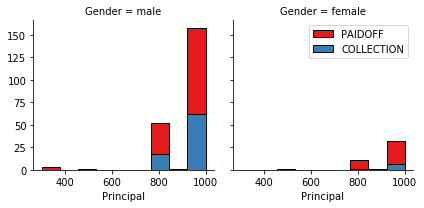

In [251]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

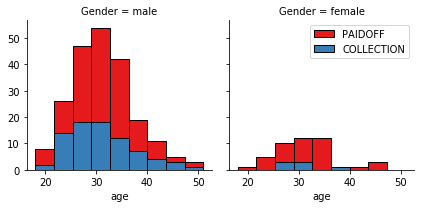

In [252]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### The day of the week people get the loan 

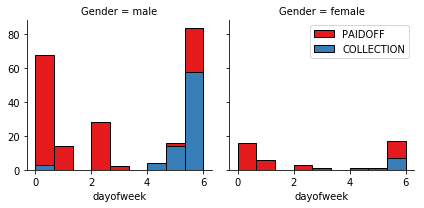

In [253]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


People who get the loan at the end of the week dont pay it off, so use Feature binarization to set a threshold values less then day 4 

In [254]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

By gender:

In [255]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Convert male to 0 and female to 1:


In [256]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### Education?

In [257]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [258]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [259]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

In [260]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [261]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [262]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

# K Nearest Neighbor(KNN)
Finding the best k to build the model with the best accuracy.  
Split your train_loan.csv into train and test to find the best __k__.

In [263]:
# first of all, I will replace 'loan_status' in df on PAIDOFF -> 0 and COLLECTION -> 1
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
y = df['loan_status'].values
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


[0.67142857 0.77142857 0.71428571 0.77142857 0.75714286 0.78571429
 0.78571429 0.77142857 0.75714286]


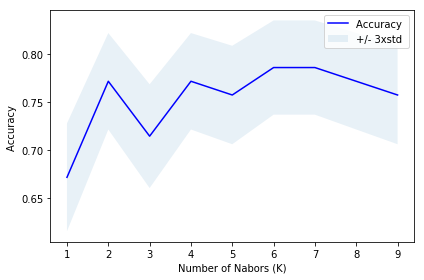

The best accuracy was with 0.7857142857142857 with k= 6


In [264]:
# Split our data on test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# import knn & metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Let's try K coefficient up to 10
if True:
    Ks = 10
    mean_acc = np.zeros((Ks - 1))
    std_acc = np.zeros((Ks - 1))
    
    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
        yhat = neigh.predict(X_test)
        mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

        std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

    print(mean_acc)
    
    plt.plot(range(1, Ks), mean_acc, 'b')
    plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Nabors (K)')
    plt.tight_layout()
    plt.show()

    print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)


In [283]:
# let's create the best knn with k = 6
knn_6 = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
knn_6_pred = knn_6.predict(X_test)

print("KNN acc by Jaccard is ", jaccard_similarity_score(y_test, knn_6_pred))
print("KNN acc by F1 score is ", f1_score(y_test, knn_6_pred, average='weighted'))

KNN acc by Jaccard is  0.7857142857142857
KNN acc by F1 score is  0.7334244702665754


# Decision Tree

In [266]:
from sklearn.tree import DecisionTreeClassifier

In [289]:
# Assuming, that we already have splitted data
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
LoanTree.fit(X_train, y_train)

predTree = LoanTree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTrees's Accuracy by F1 score is ", f1_score(y_test, predTree, average='weighted'))

DecisionTrees's Accuracy:  0.7857142857142857
DecisionTrees's Accuracy by F1 score is  0.6914285714285714


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Support Vector Machine

In [268]:
from sklearn import svm

vector = svm.SVC(kernel='linear', gamma='auto')
vector.fit(X_train, y_train)

y_vector = vector.predict(X_test)
print("SVC Accuracy: ", metrics.accuracy_score(y_test, y_vector))

SVC Accuracy:  0.7857142857142857


# Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.02, solver='lbfgs').fit(X_train, y_train)

LR_pred = LR.predict(X_test) 
print("LR Accuracy: ", metrics.accuracy_score(y_test, LR_pred))

LR_pred_proba = LR.predict_proba(X_test) #probability 

#print(LR_pred," ",LR_pred_proba)


LR Accuracy:  0.7857142857142857


# Model Evaluation using Test set

In [270]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [219]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-24 06:01:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-12-24 06:01:02 (361 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [285]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [286]:
# We have to clean & transform test data in the same way, as we did for train data
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#I will replace 'loan_status' in df on PAIDOFF -> 0 and COLLECTION -> 1
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

X_t = test_df[['Principal','terms','age','Gender','weekend']]
X_t = pd.concat([X_t,pd.get_dummies(test_df['education'])], axis=1)
X_t.drop(['Master or Above'], axis = 1,inplace=True)

X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)

y_t = test_df['loan_status'].values

# Now, let's test our trained modules

# KNN
knn_prediction = knn_6.predict(X_t)

print("KNN has ", metrics.accuracy_score(y_t, knn_prediction))
print("KNN acc by Jaccard is ", jaccard_similarity_score(y_t, knn_prediction))
print("KNN acc by F1 score is ", f1_score(y_t, knn_prediction, average='weighted'))
print("KNN by log loss is ", log_loss(y_t, knn_prediction))

KNN has  0.6851851851851852
KNN acc by Jaccard is  0.6851851851851852
KNN acc by F1 score is  0.626541384672668
KNN by log loss is  10.873377724133375


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [287]:
# Desicion tree
predTree = LoanTree.predict(X_t)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_t, predTree))
print("DecisionTrees's Accuracy by Jaccard is ", jaccard_similarity_score(y_t, predTree))
print("DecisionTrees's Accuracy by F1 score is ", f1_score(y_t, predTree, average='weighted'))
print("DecisionTrees log loss is ", log_loss(y_t, predTree))

# SVM
y_vector = vector.predict(X_t)
print("SVC Accuracy: ", metrics.accuracy_score(y_t, y_vector))
print("SVC Accuracy by Jaccard is ", jaccard_similarity_score(y_t, y_vector))
print("SVC Accuracy by F1 score is ", f1_score(y_t, y_vector, average='weighted'))
print("SVC log loss is ", log_loss(y_t, y_vector))

# LR
LR_pred = LR.predict(X_t) 
print("LR Accuracy: ", metrics.accuracy_score(y_t, LR_pred))
print("LR Accuracy by Jaccard is ", jaccard_similarity_score(y_t, LR_pred))
print("LR Accuracy by F1 score is ", f1_score(y_t, LR_pred, average='weighted'))
print("LR log loss is ", log_loss(y_t, LR_pred))

DecisionTrees's Accuracy:  0.7592592592592593
DecisionTrees's Accuracy by Jaccard is  0.7592592592592593
DecisionTrees's Accuracy by F1 score is  0.6717642373556352
DecisionTrees log loss is  8.31489061358961
SVC Accuracy:  0.7407407407407407
SVC Accuracy by Jaccard is  0.7407407407407407
SVC Accuracy by F1 score is  0.6304176516942475
SVC log loss is  8.954497583865733
LR Accuracy:  0.7407407407407407
LR Accuracy by Jaccard is  0.7407407407407407
LR Accuracy by F1 score is  0.6304176516942475
LR log loss is  8.954497583865733


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [288]:
print("Log loss is NA for KNN, DT and SVM, but if replace PAIDOFF -> 0 and COLLECTION -> 1 in 'loan_status', we can find them")

Log loss is NA for KNN, DT and SVM, but if replace PAIDOFF -> 0 and COLLECTION -> 1 in 'loan_status', we can find them


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss  |
|--------------------|---------|----------|----------|
| KNN                | 0.68    | 0.62     | NA (10.9)|
| Decision Tree      | 0.76    | 0.67     | NA (8.31)|
| SVM                | 0.74    | 0.63     | NA (8.95)|
| LogisticRegression | 0.74    | 0.63     | 8.9      |